# Analysis of Yelp Business Intelligence Data
     By Rupinder Kaur

I will analyze Yelp's business, reviews and user data from [Kaggle](https://www.kaggle.com/yelp-dataset/yelp-dataset#yelp_academic_dataset_user.json) for this project. I uploaded the dataset to AWS'S S3 bucket so it can be loaded as Spark dataframe for analysis.

## I. Installation and Initial Setup

In [1]:
# available packages
sc.list_packages()

VBox()

Starting Spark application


ID,YARN Application ID,Kind,State,Spark UI,Driver log,Current session?
1,application_1638491651227_0002,pyspark,idle,Link,Link,✔


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

SparkSession available as 'spark'.


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Package                    Version  
-------------------------- ---------
beautifulsoup4             4.9.1    
boto                       2.49.0   
click                      7.1.2    
jmespath                   0.10.0   
joblib                     0.16.0   
lxml                       4.5.2    
mysqlclient                1.4.2    
nltk                       3.5      
nose                       1.3.4    
numpy                      1.16.5   
pip                        9.0.1    
py-dateutil                2.2      
python37-sagemaker-pyspark 1.4.0    
pytz                       2020.1   
PyYAML                     5.3.1    
regex                      2020.7.14
setuptools                 28.8.0   
six                        1.13.0   
soupsieve                  1.9.5    
tqdm                       4.48.2   
wheel                      0.29.0   
windmill                   1.6

In [2]:
# installing pandas, matplotlib, scipy and seaborn
sc.install_pypi_package("pandas==1.0.3")
sc.install_pypi_package("matplotlib==3.2.1")
sc.install_pypi_package("scipy==1.7.0")
sc.install_pypi_package("seaborn==0.11.2")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

  Using cached https://files.pythonhosted.org/packages/4a/6a/94b219b8ea0f2d580169e85ed1edc0163743f55aaeca8a44c2e8fc1e344e/pandas-1.0.3-cp37-cp37m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/36/7a/87837f39d0296e723bb9b62bbb257d0355c7f6128853c78955f57342a56d/python_dateutil-2.8.2-py2.py3-none-any.whl

  Using cached https://files.pythonhosted.org/packages/b2/c2/71fcf957710f3ba1f09088b35776a799ba7dd95f7c2b195ec800933b276b/matplotlib-3.2.1-cp37-cp37m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/a0/34/895006117f6fce0b4de045c87e154ee4a20c68ec0a4c9a36d900888fb6bc/pyparsing-3.0.6-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/5c/f9/695d6bedebd747e5eb0fe8fad57b72fdf25411273a39791cde838d5a8f51/cycler-0.11.0-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/09/6b/6e567cb2e86d4e5939a9233f8734e26021b6a9c1bc4b1edccba236a84cc2/kiwisolver-1.3.2-cp37-cp37m-manylinux_2_5_x86_64.manylinux1_x86_

### Importing the Packages

In [3]:
# importing the required packages for analysis
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pyspark.sql.functions as F

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

### Loading Yelp's Business Data

In [4]:
# Loading Yelp's dataset that contains information on various businesses
business = spark.read.json("s3://sta9760-spark-yelp-dataset/Yelp_Data/yelp_academic_dataset_business.json")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [5]:
# number of columns and rows in the dataframe
print(f"Columns: {len(business.columns)} | Rows: {business.count()}")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Columns: 14 | Rows: 160585

In [6]:
# dataframe schema
business.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- address: string (nullable = true)
 |-- attributes: struct (nullable = true)
 |    |-- AcceptsInsurance: string (nullable = true)
 |    |-- AgesAllowed: string (nullable = true)
 |    |-- Alcohol: string (nullable = true)
 |    |-- Ambience: string (nullable = true)
 |    |-- BYOB: string (nullable = true)
 |    |-- BYOBCorkage: string (nullable = true)
 |    |-- BestNights: string (nullable = true)
 |    |-- BikeParking: string (nullable = true)
 |    |-- BusinessAcceptsBitcoin: string (nullable = true)
 |    |-- BusinessAcceptsCreditCards: string (nullable = true)
 |    |-- BusinessParking: string (nullable = true)
 |    |-- ByAppointmentOnly: string (nullable = true)
 |    |-- Caters: string (nullable = true)
 |    |-- CoatCheck: string (nullable = true)
 |    |-- Corkage: string (nullable = true)
 |    |-- DietaryRestrictions: string (nullable = true)
 |    |-- DogsAllowed: string (nullable = true)
 |    |-- DriveThru: string (nullable = true)
 |    |-- GoodForDancing: str

In [7]:
# displaying the first 5 rows with columns: business_id, name, city, state, stars, categories
business.select("business_id", "name", "city", "state", "stars","categories").show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+--------------------+-----------+-----+-----+--------------------+
|         business_id|                name|       city|state|stars|          categories|
+--------------------+--------------------+-----------+-----+-----+--------------------+
|6iYb2HFDywm3zjuRg...| Oskar Blues Taproom|    Boulder|   CO|  4.0|Gastropubs, Food,...|
|tCbdrRPZA0oiIYSmH...|Flying Elephants ...|   Portland|   OR|  4.0|Salad, Soup, Sand...|
|bvN78flM8NLprQ1a1...|      The Reclaimory|   Portland|   OR|  4.5|Antiques, Fashion...|
|oaepsyvc0J17qwi8c...|         Great Clips|Orange City|   FL|  3.0|Beauty & Spas, Ha...|
|PE9uqAjdw0E4-8mjG...|   Crossfit Terminus|    Atlanta|   GA|  4.0|Gyms, Active Life...|
+--------------------+--------------------+-----------+-----+-----+--------------------+
only showing top 5 rows

##  II. Analyzing the Column, "Categories", from Yelp's Business Data

I will be answering the following questions in this section: 
> How many unique categories are represented in this dataset?

> What are the top categories?
 

### Association Table

In [8]:
# Since the categories are given in a list for each business,we will need to use explode and split to separate the elements
business_exploded = business.withColumn('category', F.explode(F.split('categories', ",")))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [9]:
# displaying two columns of the exploded dataset
 # We can see that categories have been separated
business_exploded.select('business_id', 'category').show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+-------------+
|         business_id|     category|
+--------------------+-------------+
|6iYb2HFDywm3zjuRg...|   Gastropubs|
|6iYb2HFDywm3zjuRg...|         Food|
|6iYb2HFDywm3zjuRg...| Beer Gardens|
|6iYb2HFDywm3zjuRg...|  Restaurants|
|6iYb2HFDywm3zjuRg...|         Bars|
+--------------------+-------------+
only showing top 5 rows

### Total Unique Categories

In [10]:
# There are 2487 unique categories for business 
business_exploded.select("category").distinct().count()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

2487

### Top Categories 

#### Number of Businesses per Category

In [11]:
# Count businesses per category-> 68 businesses that fall into dermatologists' category etc.
business_grby = business_exploded.groupby('category').count()
business_grby.show(20)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+-----+
|            category|count|
+--------------------+-----+
|      Dermatologists|   68|
|      Paddleboarding|   12|
|               Tires| 1456|
|    Historical Tours|   60|
|         Hobby Shops|  135|
|    Military Surplus|   11|
| Food Safety Trai...|    2|
|          Bubble Tea|  184|
|             Embassy|    3|
|            Handyman|   87|
|            Macarons|   50|
|             Propane|   83|
|             Tanning|  147|
|  Convenience Stores| 1340|
|            Japanese| 2039|
|         Car Dealers| 1013|
|             Lawyers|  422|
|             Rolfing|   28|
|        IV Hydration|   47|
|      Aerial Fitness|    2|
+--------------------+-----+
only showing top 20 rows

#### Bar Chart of the Top Categories

In [12]:
# sorting the above query for bar chart
df_bar = business_grby.orderBy('count', ascending=False)
df_bar.show(10)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-----------------+-----+
|         category|count|
+-----------------+-----+
|      Restaurants|36340|
|             Food|22094|
|         Shopping|20056|
|      Restaurants|14423|
|    Home Services|12001|
|    Beauty & Spas|11633|
| Health & Medical|11390|
|        Nightlife| 9808|
|   Local Services| 9299|
|             Bars| 8914|
+-----------------+-----+
only showing top 10 rows

In [13]:
# transforming the above dataframe to pandas dataframe
pdf = df_bar.toPandas()
# taking only the top 20
pdf_20 = pdf[0:20]

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

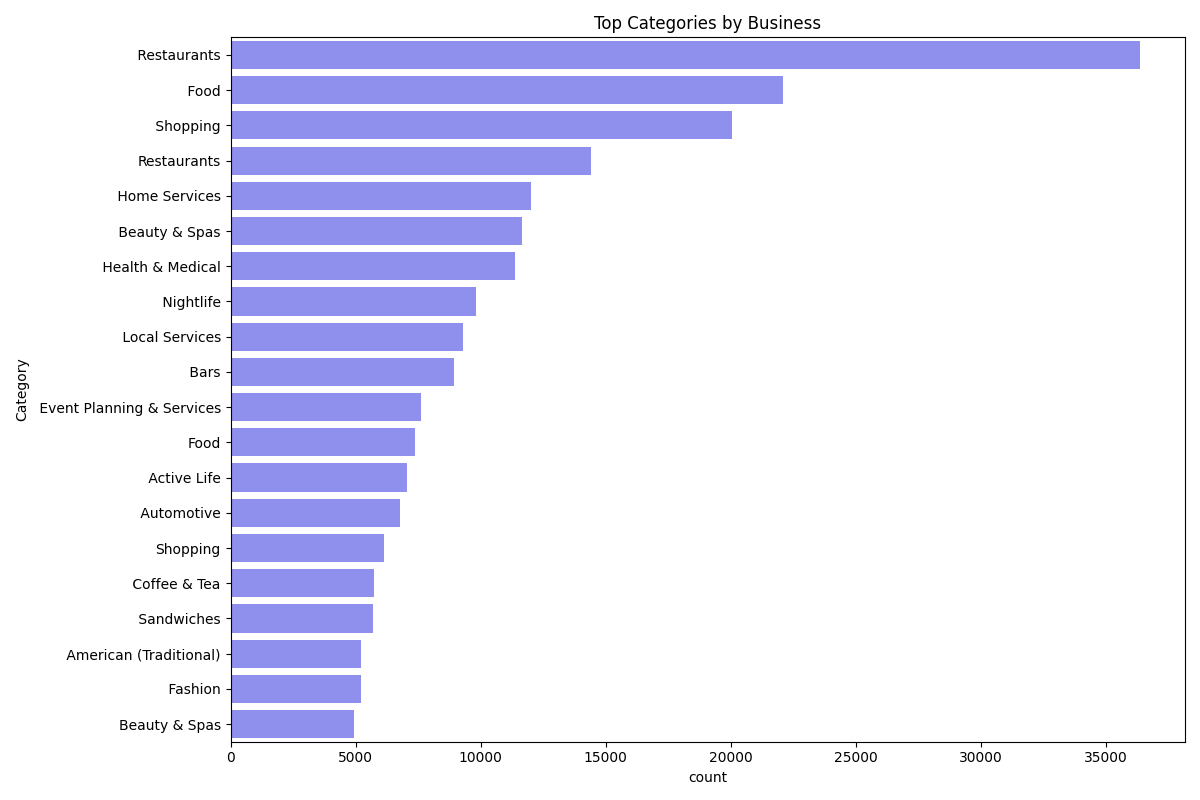

In [14]:
plt.figure(figsize = (12,8))

ax = sns.barplot(x="count", y="category", data=pdf_20, alpha = 0.5, color = 'b')
ax.set_title("Top Categories by Business")
ax.set_ylabel("Category")
plt.tight_layout()
plt.show()

%matplot plt

## III. Do Yelp Reviews Skew Negative?

In this section, I will be checking the following:
> Are the people who left written reviews more dissatisfied/ satisfied per actual business ratings? 

### Loading Yelp's Review Data

In [15]:
## loading the review data
review = spark.read.json("s3://sta9760-spark-yelp-dataset/Yelp_Data/yelp_academic_dataset_review.json")
review.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- business_id: string (nullable = true)
 |-- cool: long (nullable = true)
 |-- date: string (nullable = true)
 |-- funny: long (nullable = true)
 |-- review_id: string (nullable = true)
 |-- stars: double (nullable = true)
 |-- text: string (nullable = true)
 |-- useful: long (nullable = true)
 |-- user_id: string (nullable = true)

In [16]:
## Displaying two columns of the review dataset
review.select("business_id", "stars").show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+-----+
|         business_id|stars|
+--------------------+-----+
|buF9druCkbuXLX526...|  4.0|
|RA4V8pr014UyUbDvI...|  4.0|
|_sS2LBIGNT5NQb6PD...|  5.0|
|0AzLzHfOJgL7ROwhd...|  2.0|
|8zehGz9jnxPqXtOc7...|  4.0|
+--------------------+-----+
only showing top 5 rows

### Joining the Review Data with Business Data

In [17]:
# Average stars per business for the review data
avg_re = review.groupby("business_id").avg("stars")
avg_re.show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+-----------------+
|         business_id|       avg(stars)|
+--------------------+-----------------+
|yHtuNAlYKtRZniO8O...|4.714285714285714|
|R0IJhEI-zSJpYT1YN...|3.606060606060606|
|uEUweopM30lHcVxjO...|              3.0|
|L3WCfeVozu5etMhz4...|              4.2|
|XzXcpPCb8Y5huklEN...|4.666666666666667|
+--------------------+-----------------+
only showing top 5 rows

In [18]:
# joining the dataframe that contains average stars per business with Yelp's business data 
merged_df = avg_re.join(business, avg_re.business_id == business.business_id)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [19]:
# displaying the joined dataset
merged_df.select("avg(stars)", "stars", "name", "city", "state").show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+------------------+-----+--------------------+----------+-----+
|        avg(stars)|stars|                name|      city|state|
+------------------+-----+--------------------+----------+-----+
|               5.0|  5.0|    CheraBella Salon|   Peabody|   MA|
|             3.875|  4.0|Mezcal Cantina & ...|  Columbus|   OH|
|3.8666666666666667|  4.0|    Red Table Coffee|    Austin|   TX|
|               5.0|  5.0|          WonderWell|    Austin|   TX|
|             3.375|  3.5|         Avalon Oaks|Wilmington|   MA|
+------------------+-----+--------------------+----------+-----+
only showing top 5 rows

### Difference Between the Star Ratings

In [20]:
# taking difference of the average stars accumulated from written reviews and the actual star rating of the business
diff_df = merged_df.withColumn("diff", (F.col("avg(stars)") - F.col("stars"))/F.col("stars"))
                               

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [21]:
diff_df.select("diff","avg(stars)", "stars", "name", "city", "state").show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+------------------+-----+--------------------+----------+-----+
|                diff|        avg(stars)|stars|                name|      city|state|
+--------------------+------------------+-----+--------------------+----------+-----+
|                 0.0|               5.0|  5.0|    CheraBella Salon|   Peabody|   MA|
|            -0.03125|             3.875|  4.0|Mezcal Cantina & ...|  Columbus|   OH|
|-0.03333333333333...|3.8666666666666667|  4.0|    Red Table Coffee|    Austin|   TX|
|                 0.0|               5.0|  5.0|          WonderWell|    Austin|   TX|
|-0.03571428571428571|             3.375|  3.5|         Avalon Oaks|Wilmington|   MA|
+--------------------+------------------+-----+--------------------+----------+-----+
only showing top 5 rows

### Histogram: Difference Between the Star Ratings

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

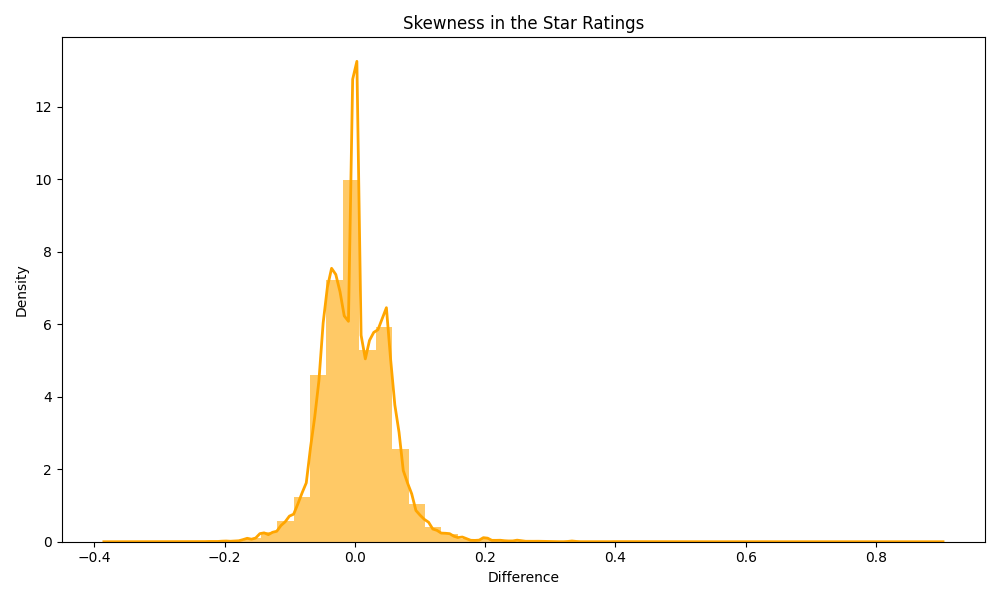

In [22]:
# transforming the above dataframe into pandas dataframe
pdf_diff = diff_df.toPandas()

# Plotting the difference 
plt.figure(figsize = (10,6))

kwargs = dict(hist_kws={'alpha':.6}, kde_kws={'linewidth':2})

sns.distplot(x=pdf_diff["diff"], color="orange", **kwargs)
plt.title("Skewness in the Star Ratings")
plt.xlabel("Difference")
plt.tight_layout()
plt.show()

%matplot plt


As it can be seen from the graph above, most reviewers are in agreement with the actual business ratings. There is no skewness and zero is the center. The reviewers who were more satisfied than the actual business ratings and the reviewers who were more dissatisfied than the actual business ratings, are very similar in numbers, per the distribution plot above.
** Please note that when I say reviewers, I am only refering to the ones who left written reviews. 

## IV. Elite Vs. Non-Elites

In this section, I will be answering the following questions:
>  Are reviews from elite users more useful?

> Do elite users have higher average star ratings?

### Loading the Yelp's User Data

In [23]:
# Loading Yelp's dataset that contains information on the users
user = spark.read.json("s3://sta9760-spark-yelp-dataset/Yelp_Data/yelp_academic_dataset_user.json")
user.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- average_stars: double (nullable = true)
 |-- compliment_cool: long (nullable = true)
 |-- compliment_cute: long (nullable = true)
 |-- compliment_funny: long (nullable = true)
 |-- compliment_hot: long (nullable = true)
 |-- compliment_list: long (nullable = true)
 |-- compliment_more: long (nullable = true)
 |-- compliment_note: long (nullable = true)
 |-- compliment_photos: long (nullable = true)
 |-- compliment_plain: long (nullable = true)
 |-- compliment_profile: long (nullable = true)
 |-- compliment_writer: long (nullable = true)
 |-- cool: long (nullable = true)
 |-- elite: string (nullable = true)
 |-- fans: long (nullable = true)
 |-- friends: string (nullable = true)
 |-- funny: long (nullable = true)
 |-- name: string (nullable = true)
 |-- review_count: long (nullable = true)
 |-- useful: long (nullable = true)
 |-- user_id: string (nullable = true)
 |-- yelping_since: string (nullable = true)

In [24]:
user.count()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

2189457

In [25]:
# we can see that not all users are elite
user.select("user_id","average_stars", "elite").show(10, truncate = False)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+----------------------+-------------+----------------------------------------------------------------------+
|user_id               |average_stars|elite                                                                 |
+----------------------+-------------+----------------------------------------------------------------------+
|q_QQ5kBBwlCcbL1s4NVK3g|3.85         |2006,2007,2008,2009,2010,2011,2012,2013,2014                          |
|dIIKEfOgo0KqUfGQvGikPg|4.09         |2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,20,20|
|D6ErcUnFALnCQN4b1W_TlA|3.76         |2010,2011                                                             |
|JnPIjvC0cmooNDfsa9BmXg|3.77         |2009,2010,2011,2012,2013,2014                                         |
|37Hc8hr3cw0iHLoPzLK6Ow|3.72         |2009,2010,2011                                                        |
|n-QwITZYrXlKQRiV30MqNg|3.59         |2010,2011,2012,2013,2014,2015,2016                                    |
|eCJoZqpV1

### Labeling Users as Elite or Non-Elite

In [26]:
#labeling users
user_labeled = user.withColumn("elite_yes_no", F.when(F.length(F.col("elite")) != 0 , "yes")
                        .when(F.length(F.col("elite")) == 0 , "no")
                              ).select("user_id","name","elite","elite_yes_no", "average_stars")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [27]:
user_labeled.show(20)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+----------+--------------------+------------+-------------+
|             user_id|      name|               elite|elite_yes_no|average_stars|
+--------------------+----------+--------------------+------------+-------------+
|q_QQ5kBBwlCcbL1s4...|      Jane|2006,2007,2008,20...|         yes|         3.85|
|dIIKEfOgo0KqUfGQv...|      Gabi|2007,2008,2009,20...|         yes|         4.09|
|D6ErcUnFALnCQN4b1...|     Jason|           2010,2011|         yes|         3.76|
|JnPIjvC0cmooNDfsa...|       Kat|2009,2010,2011,20...|         yes|         3.77|
|37Hc8hr3cw0iHLoPz...| Christine|      2009,2010,2011|         yes|         3.72|
|n-QwITZYrXlKQRiV3...|   Natasha|2010,2011,2012,20...|         yes|         3.59|
|eCJoZqpV1fDKJGAsX...|   Bridget|                    |          no|         3.86|
|cojecOwQJpsYDxnjt...|    Steven|           2010,2011|         yes|         3.79|
|1jXmzuIFKxTnEnR0p...|     Clara|2010,2011,2012,20...|         yes|         3.43|
|-8QoOIfvwwxJ4sY

In [28]:
# renaming columns that match with column names of review data set
user_labeled = user_labeled.withColumnRenamed("user_id","user_user_id")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

### Joining the Users Data with Review Data 

In [29]:
# taking sum of how many people found the reviews useful for each user from the review dataset
grp_review_user = review.groupby("user_id").sum("useful")
grp_review_user.orderBy("sum(useful)", ascending=False).show(10)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+-----------+
|             user_id|sum(useful)|
+--------------------+-----------+
|YTu0c-1I9ECeksIgo...|      46163|
|gqL5KBs2oS7qobnyd...|      39394|
|AbMjnKOwg736fcIu8...|      25790|
|JjXuiru1_ONzDkYVr...|      21342|
|j14WgRoU_-2ZE1aw1...|      19241|
|PI51J_fKhEfZKhi-M...|      18839|
|Pf7FI0OukC_CEcCz0...|      16644|
|921g0ra2_kwuW1Yo8...|      15903|
|uAL9HaTJHKJVLOaTu...|      12957|
|hWDybu_KvYLSdEFzG...|      12929|
+--------------------+-----------+
only showing top 10 rows

In [30]:
# joining the filtered_user and grp_review_user dataframes
merged_df2 = user_labeled.join(grp_review_user, user_labeled.user_user_id == grp_review_user.user_id)
merged_df2.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- user_user_id: string (nullable = true)
 |-- name: string (nullable = true)
 |-- elite: string (nullable = true)
 |-- elite_yes_no: string (nullable = true)
 |-- average_stars: double (nullable = true)
 |-- user_id: string (nullable = true)
 |-- sum(useful): long (nullable = true)

In [31]:
# removing the user_user_id -> same as user_id
merged_df2 = merged_df2.drop("user_user_id")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [32]:
merged_df2.orderBy("sum(useful)", ascending=False).show(10)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------+--------------------+------------+-------------+--------------------+-----------+
|    name|               elite|elite_yes_no|average_stars|             user_id|sum(useful)|
+--------+--------------------+------------+-------------+--------------------+-----------+
|   Laura|2017,2018,2019,20,20|         yes|         4.33|YTu0c-1I9ECeksIgo...|      46163|
|   Stacy|2013,2014,2015,20...|         yes|          3.9|gqL5KBs2oS7qobnyd...|      39394|
| Michael|2010,2011,2012,20...|         yes|         3.66|AbMjnKOwg736fcIu8...|      25790|
| Richard|2011,2012,2013,20...|         yes|         4.15|JjXuiru1_ONzDkYVr...|      21342|
|  Daniel|2009,2010,2011,20...|         yes|         3.73|j14WgRoU_-2ZE1aw1...|      19241|
|   Errol|2009,2010,2011,20...|         yes|         4.13|PI51J_fKhEfZKhi-M...|      18839|
|     Don|2007,2008,2009,20...|         yes|         3.93|Pf7FI0OukC_CEcCz0...|      16644|
|Kimberly|2017,2018,2019,20,20|         yes|         4.53|921g0ra2_kwuW1Yo8...| 

### Boxplots: Usefulness and Average Star Ratings

In [33]:
# transforming the above dataframe into pandas dataframe
pdf_merged_df2 = merged_df2.toPandas()
pdf_merged_df2.head()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

     name elite  ...                 user_id  sum(useful)
0   Shaun        ...  --1UpCuUDJQbqiuFXkOzaw            1
1  George        ...  --3Bk72HakneTyp3DEjecg            0
2   Rogan        ...  --3Hl2oAvTPlq-f7KtogJg            2
3      Ty        ...  --5FEgQNB3_7WtjxkCsGqA            3
4      Ma        ...  --DCpT4hVZNRpRx572pkEw            0

[5 rows x 6 columns]

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

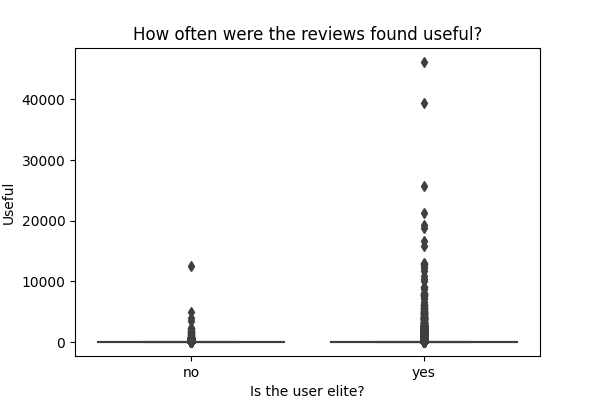

In [35]:
plt.figure(figsize=(6,4))

sns.boxplot(x = "elite_yes_no", y = "sum(useful)", data = pdf_merged_df2 )

plt.xlabel("Is the user elite?")
plt.ylabel("Useful")
plt.title("How often were the reviews found useful?")
plt.show()
# Clearly majority of the reviews from both elite and non-elite users are not useful;  min, median, max are close to zero. 
# However, as it can be seen from the outliers, more useful reviews come from elite users

%matplot plt

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

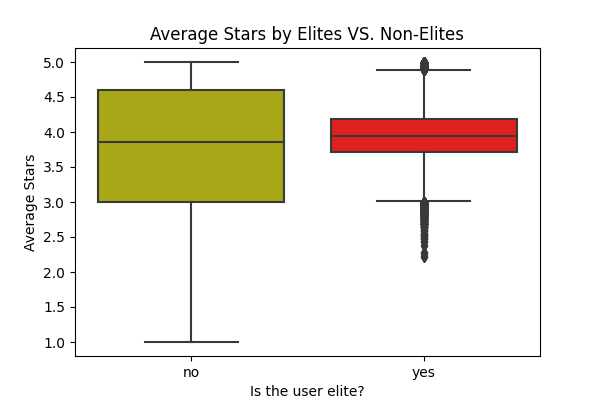

In [36]:
plt.figure(figsize=(6,4))

sns.boxplot(x = "elite_yes_no", y = "average_stars", data = pdf_merged_df2, palette = ['y','r'] )
plt.xlabel("Is the user elite?")
plt.ylabel("Average Stars")
plt.title("Average Stars by Elites VS. Non-Elites")
plt.show()
# minimum value of average stars is much higher fo elite users; median and maximum very similar
# there is less variability in average stars for elite users

%matplot plt


## Conclusion

In this project, I analyzed Yelp's review, business and user datasets from Kaggle. The dataset was uploaded to AWS's S3. I used AWS'S EMR to run Jupyter notebook with PySpark kernel to analyze the data.